# Propane complete combustion model

This code is for complete combustion of propane - which is main ingridient of LPG. For simplification of problem (propane is available in GRI-mech database, butane not) simulation only with propane will be modelled. Reactor object with Cantera will be prepared to determine the auto-ignition timing of a mixture, and observe changes of temperature, pressure, and content of certain chemical elements in created mixture.

In [1]:
import numpy as np
import cantera as ct
import math
import csv
import matplotlib.pyplot as plt

First, lets create a mixture of gases that are inside of the combustion chamber. As mentioned, I will be using GRI-Mech 3.0, the 53-species, 325-reaction natural gas combustion mechanism, standard for Cantera.

In [2]:
gas1 = ct.Solution('gri30.xml')

A LPG-fueled internal combustion engine obtains energy from the combustion of LPG's various hydrocarbons with oxygen from the ambient air, yielding carbon dioxide and water as exhaust. The combustion of propane, performs the chemical reaction: 

C 3 H 8 + 5 O 2 + 18.8 N 2 ⟶ 3 CO 2 + 4 H 2 O + 18.8 N 2 + Heat

So we need C3H8 and air (O2 and N2 in ratio 1:3.76; air is 21% oxygen and 79% nitrogen, lets obey rest of gases) to react with each other during this process.
I found in internet and literature properties of LPG-air mixture inside of combustion chamber of of four-stroke internal combustion engine - max pressure (shortly before combustion) is around 3MPa.
Temperature of propane combustion is equal to around 490 Celsius degree= 763 K.

In [3]:
T = 1200
P = 3000000
X = 'C3H8:1 O2:5 N2:18.8' 
gas1.TPX = T,P,X

Lets check properties of created gas:

In [4]:
gas1()


  gri30:

       temperature            1200  K
          pressure           3e+06  Pa
           density         8.85971  kg/m^3
  mean mol. weight         29.4655  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      9.6122e+05        2.832e+07     J
   internal energy      6.2261e+05        1.835e+07     J
           entropy          7581.8        2.234e+05     J/K
    Gibbs function     -8.1369e+06       -2.398e+08     J
 heat capacity c_p          1368.6        4.033e+04     J/K
 heat capacity c_v          1086.5        3.201e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.201613         0.218947         -25.3004
                N2       0.758065         0.720709         -22.2321
              C3H8      0.0403226        0.0603447         -51.4817
     [  +50 minor]        

Now an ideal gas Reactor filled with gas will be created, and the simulation with a ReactorNet object will be prepared

In [5]:
r=ct.Reactor(gas1)
sim=ct.ReactorNet([r])

Arrays to hold the datas

In [6]:
times = np.zeros(1000)
data = np.zeros((1000,5))

EndTime&StartTime and timestep of simulation:

In [7]:
time=0
tf = 0.005
dt=tf/1000

Loop for calculation:

In [8]:
for n in range(1000):
    time += dt
    sim.advance(time)
    times[n] = time
    data[n,0] = r.T
    data[n,1] = r.thermo.P
    data[n,2:]=r.thermo['O2', 'H' , 'C3H8'].X

Now plots of calculations will be printed out. Firstly plot for Temperature vs time:

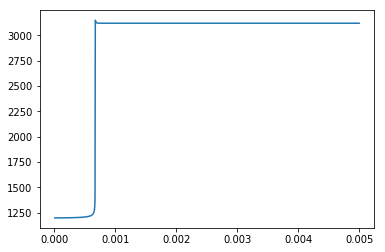

In [9]:
plt.plot(times,data[:,0])
plt.show()

Plot for 02 content vs time:

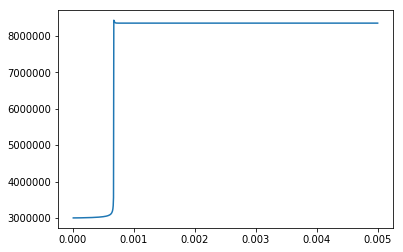

In [10]:
plt.plot(times,data[:,1])
plt.show()

Plot for H content vs time:

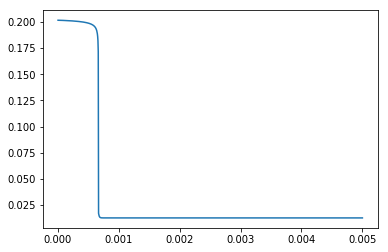

In [11]:
plt.plot(times,data[:,2])
plt.show()

Plot for C3H8 content vs time:

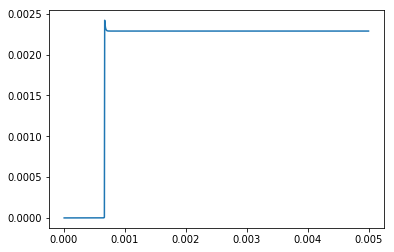

In [12]:
plt.plot(times,data[:,3])
plt.show()